In [2]:
# Load the data
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import joblib

data = pd.read_csv('user_measurements.csv')

# Extract features and labels
features = data[['weight' , 'age' , 'height']]
labels = data['size']
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)
# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

In [11]:
# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add cluster information to the dataset
data['cluster'] = clusters

In [12]:
# Create a mapping of clusters to sizes
cluster_size_mapping = data.groupby('cluster')['size'].agg(lambda x: x.value_counts().index[0])

# Save the model and scaler

joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(cluster_size_mapping, 'cluster_size_mapping.pkl')

print("Model trained and saved")

# Load the model and scaler

kmeans = joblib.load('kmeans_model.pkl')
scaler = joblib.load('scaler.pkl')
cluster_size_mapping = joblib.load('cluster_size_mapping.pkl')

# Function to predict size based on a new user’s measurements
def predict_size(new_measurement):
    scaled_measurement = scaler.transform([new_measurement])
    cluster = kmeans.predict(scaled_measurement)[0]
    return cluster_size_mapping[cluster]

# Example prediction
new_user_measurements = [65 , 23 , 160]  # Replace with actual measurements
predicted_size = predict_size(new_user_measurements)
print(f'Predicted Size: {predicted_size}')

Model trained and saved
Predicted Size: M


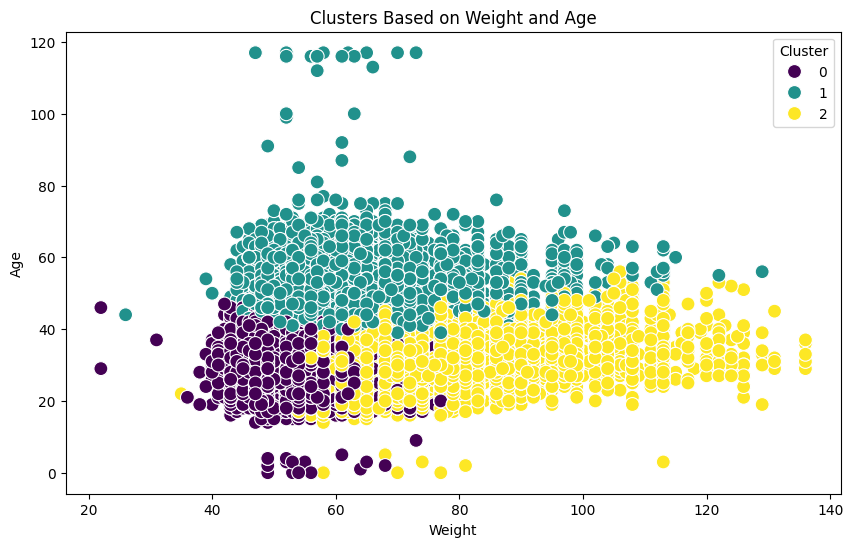

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of two features colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_imputed[:, 0], y=features_imputed[:, 1], hue=data['cluster'], palette='viridis', s=100)
plt.title('Clusters Based on Weight and Age')
plt.xlabel('Weight')
plt.ylabel('Age')
plt.legend(title='Cluster')
plt.show()

In [14]:
import joblib
from sklearn.metrics import accuracy_score

# Load the new dataset
new_data = pd.read_csv('clothSize.csv')  # Replace with your dataset path

# Handle missing values for numeric columns only
numeric_cols = new_data.select_dtypes(include=['number']).columns
new_data[numeric_cols] = new_data[numeric_cols].fillna(new_data[numeric_cols].mean())

# Extract features (ensure they match the original training set)
new_features = new_data[['weight', 'age', 'height']]  # Replace with actual feature columns

# Load the previously saved objects
scaler = joblib.load('scaler.pkl')
kmeans = joblib.load('kmeans_model.pkl')
cluster_size_mapping = joblib.load('cluster_size_mapping.pkl')

# Scale the new features
new_features_scaled = scaler.transform(new_features)

# Predict the cluster
new_clusters = kmeans.predict(new_features_scaled)

# Map clusters to predicted sizes
new_data['predicted_size'] = [cluster_size_mapping[cluster] for cluster in new_clusters]

# Calculate accuracy (only if the actual sizes are available)
if 'size' in new_data.columns:
    accuracy = accuracy_score(new_data['size'], new_data['predicted_size'])
    print(f'Accuracy of the model on the new dataset: {accuracy:.2%}')
else:
    print("Actual sizes are not available in the dataset, so accuracy cannot be calculated.")


c:\Users\tashv\OneDrive\Desktop\GRID\sklearn-env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Accuracy of the model on the new dataset: 29.39%


Accuracy: 51.31%


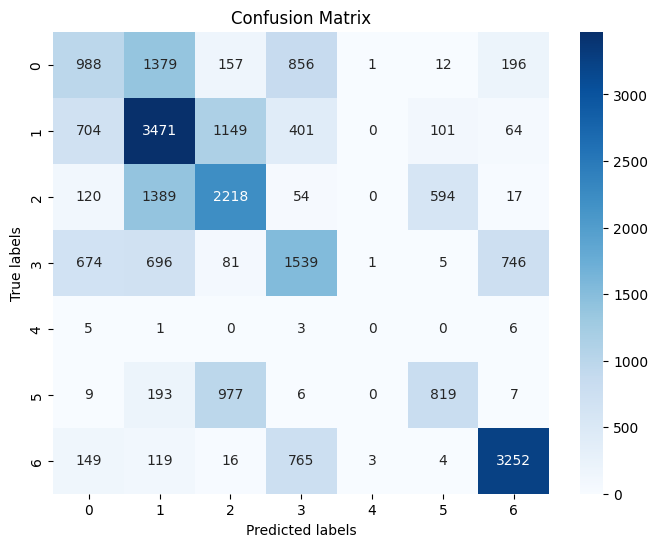

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'size' is your target label
X_train, X_test, y_train, y_test = train_test_split(features, data['size'], test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
